Class distribution:
is_alzheimers
0    0.895609
1    0.104391
Name: proportion, dtype: float64
Random Forest CV ROC AUC: 0.9971 (+/- 0.0010)
Logistic Regression CV ROC AUC: 0.6647 (+/- 0.0144)
Gradient Boosting CV ROC AUC: 0.9947 (+/- 0.0015)
SVM CV ROC AUC: 0.5888 (+/- 0.0361)
Neural Network CV ROC AUC: 0.8154 (+/- 0.0073)
Naive Bayes CV ROC AUC: 0.6469 (+/- 0.0176)
Decision Tree CV ROC AUC: 0.9918 (+/- 0.0042)


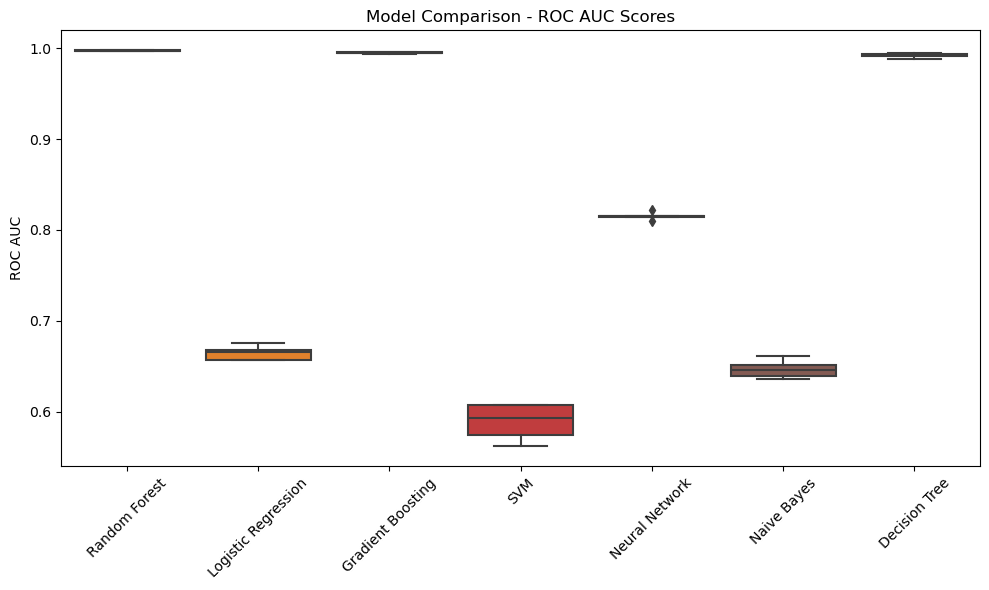


Best Model: Random Forest
Test ROC AUC: 0.9979

Confusion Matrix:
[[12452    21]
 [  133  1340]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12473
           1       0.98      0.91      0.95      1473

    accuracy                           0.99     13946
   macro avg       0.99      0.95      0.97     13946
weighted avg       0.99      0.99      0.99     13946



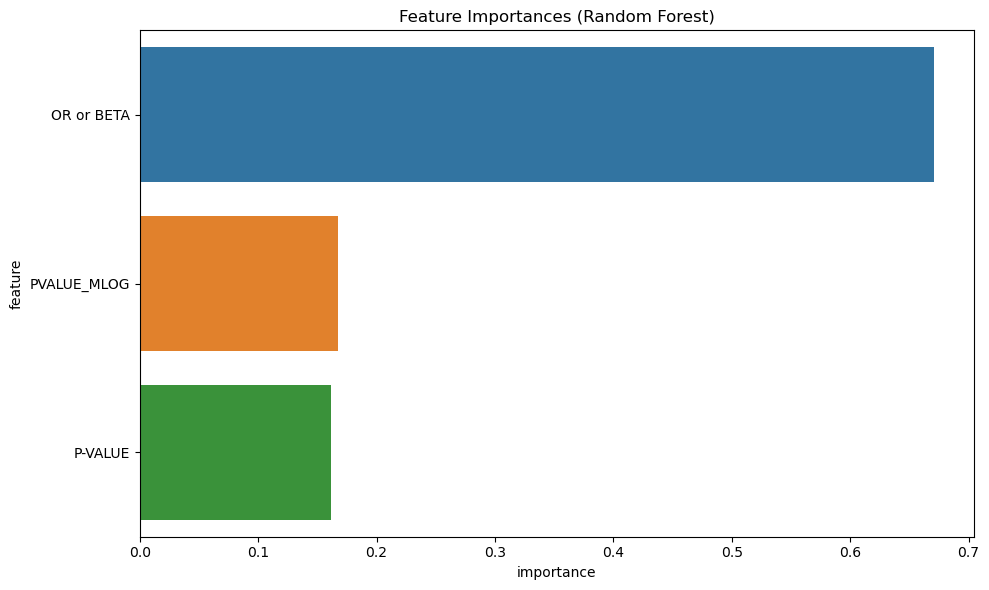

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')

# Create target variable
df['is_alzheimers'] = df['DISEASE/TRAIT'].str.contains('Alzheimer', case=False).astype(int)

# Select features and target
features = ['P-VALUE', 'OR or BETA', 'PVALUE_MLOG']  # Added 'PVALUE_MLOG'
target = 'is_alzheimers'

X = df[features]
y = df[target]

# Print class distribution
print("Class distribution:")
print(y.value_counts(normalize=True))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Perform cross-validation and store results
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    cv_scores[name] = scores
    print(f"{name} CV ROC AUC: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(cv_scores))
plt.title('Model Comparison - ROC AUC Scores')
plt.ylabel('ROC AUC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train the best performing model on the entire training set
best_model_name = max(cv_scores, key=lambda x: cv_scores[x].mean())
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred = best_model.predict(X_test_scaled)

print(f"\nBest Model: {best_model_name}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance (if applicable)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_imp = pd.DataFrame({'feature': features, 'importance': importances})
    feature_imp = feature_imp.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_imp)
    plt.title(f'Feature Importances ({best_model_name})')
    plt.tight_layout()
    plt.show()
elif hasattr(best_model, 'coef_'):
    coefficients = best_model.coef_[0]
    feature_imp = pd.DataFrame({'feature': features, 'coefficient': coefficients})
    feature_imp = feature_imp.reindex(feature_imp.coefficient.abs().sort_values(ascending=False).index)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coefficient', y='feature', data=feature_imp)
    plt.title(f'Feature Coefficients ({best_model_name})')
    plt.tight_layout()
    plt.show()

In [4]:
# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Print all column names
print("All columns in the dataset:")
for column in df.columns:
    print(column)

# Print information about each column, including data type and non-null count
print("\nDetailed information about each column:")
print(df.info())

# Print summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Print unique values for categorical columns (adjust the number as needed)
print("\nUnique values in categorical columns (showing up to 10 unique values):")
for column in df.select_dtypes(include=['object', 'category']).columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values[:10] if len(unique_values) > 10 else unique_values}")

# Print the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

All columns in the dataset:
DATE ADDED TO CATALOG
PUBMEDID
FIRST AUTHOR
DATE
JOURNAL
LINK
STUDY
DISEASE/TRAIT
INITIAL SAMPLE SIZE
REPLICATION SAMPLE SIZE
REGION
CHR_ID
CHR_POS
REPORTED GENE(S)
MAPPED_GENE
UPSTREAM_GENE_ID
DOWNSTREAM_GENE_ID
SNP_GENE_IDS
UPSTREAM_GENE_DISTANCE
DOWNSTREAM_GENE_DISTANCE
STRONGEST SNP-RISK ALLELE
SNPS
MERGED
SNP_ID_CURRENT
CONTEXT
INTERGENIC
RISK ALLELE FREQUENCY
P-VALUE
PVALUE_MLOG
P-VALUE (TEXT)
OR or BETA
95% CI (TEXT)
PLATFORM [SNPS PASSING QC]
CNV
MAPPED_TRAIT
MAPPED_TRAIT_URI
STUDY ACCESSION
GENOTYPING TECHNOLOGY
Gene_Key
Entry
Reviewed
Entry Name
Protein names
Gene Names
Organism
Length
Involvement in disease
Sequence_y

Detailed information about each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69728 entries, 0 to 69727
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE ADDED TO CATALOG       69728 non-null  object 
 1   PUBMEDID 

MAPPED_TRAIT_URI: ['http://www.ebi.ac.uk/efo/EFO_0007646'
 'http://www.ebi.ac.uk/efo/EFO_0005194'
 'http://www.ebi.ac.uk/efo/EFO_0005194, http://www.ebi.ac.uk/efo/EFO_0006514'
 'http://www.ebi.ac.uk/efo/EFO_0005194, http://www.ebi.ac.uk/efo/EFO_0007738'
 'http://purl.obolibrary.org/obo/MONDO_0004975, http://www.ebi.ac.uk/efo/EFO_0005194'
 'http://www.ebi.ac.uk/efo/EFO_0004763'
 'http://www.ebi.ac.uk/efo/EFO_0004670'
 'http://www.ebi.ac.uk/efo/EFO_0004670, http://www.ebi.ac.uk/efo/EFO_0006794, http://www.ebi.ac.uk/efo/EFO_0006793'
 'http://www.ebi.ac.uk/efo/EFO_0004670, http://www.ebi.ac.uk/efo/EFO_0006794'
 'http://purl.obolibrary.org/obo/MONDO_0004975, http://www.ebi.ac.uk/efo/EFO_0004670']
STUDY ACCESSION: ['GCST003082' 'GCST010339' 'GCST90103622' 'GCST90103510' 'GCST90103511'
 'GCST90103558' 'GCST90103559' 'GCST90103574' 'GCST90103543' 'GCST003113']
GENOTYPING TECHNOLOGY: ['Genome-wide genotyping array' 'Genome-wide sequencing'
 'Genome-wide genotyping array, Genome-wide sequencing'

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')

# Create target variable
df['is_alzheimers'] = df['DISEASE/TRAIT'].str.contains('Alzheimer', case=False).astype(int)

# Select features
numeric_features = ['P-VALUE', 'PVALUE_MLOG', 'OR or BETA', 'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE']
categorical_features = ['CHR_ID', 'CONTEXT', 'MAPPED_GENE']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Prepare the features and target
X = df[numeric_features + categorical_features]
y = df['is_alzheimers']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the pipeline
clf.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Predictions on test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# After the evaluation metrics, replace the feature importance code with this:

# Feature importance
numeric_feature_names = numeric_features
categorical_feature_names = clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
feature_names = numeric_feature_names + categorical_feature_names

importances = clf.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Function to make predictions
def predict_alzheimers_risk(data):
    return clf.predict_proba(data)[:, 1]

# Example usage
example_data = pd.DataFrame({
    'P-VALUE': [1e-5],
    'PVALUE_MLOG': [5],
    'OR or BETA': [1.5],
    'UPSTREAM_GENE_DISTANCE': [1000],
    'DOWNSTREAM_GENE_DISTANCE': [1000],
    'CHR_ID': ['1'],
    'CONTEXT': ['intron_variant'],
    'MAPPED_GENE': ['APP']
})

prediction = predict_alzheimers_risk(example_data)
print(f"\nPredicted Alzheimer's risk for example data: {prediction[0]:.4f}")

Cross-validation ROC AUC: 0.9997 (+/- 0.0005)

Confusion Matrix:
[[12490     0]
 [   18  1438]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12490
           1       1.00      0.99      0.99      1456

    accuracy                           1.00     13946
   macro avg       1.00      0.99      1.00     13946
weighted avg       1.00      1.00      1.00     13946

Test ROC AUC: 0.9996

Top 10 Most Important Features:
                       feature  importance
2                   OR or BETA    0.565425
0                      P-VALUE    0.154054
1                  PVALUE_MLOG    0.153585
214                  CHR_ID_19    0.015771
486     CONTEXT_intron_variant    0.010141
3       UPSTREAM_GENE_DISTANCE    0.005327
4     DOWNSTREAM_GENE_DISTANCE    0.004970
2258       MAPPED_GENE_NECTIN2    0.003807
51                   CHR_ID_11    0.002736
461             CHR_ID_Unknown    0.002328

Predicted Alzheimer's ris

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Load the data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')

# Create target variable
df['is_alzheimers'] = df['DISEASE/TRAIT'].str.contains('Alzheimer', case=False).astype(int)

# Feature engineering
def bin_p_value(p):
    if p < 1e-5:
        return 'very_low'
    elif p < 1e-3:
        return 'low'
    elif p < 0.05:
        return 'medium'
    else:
        return 'high'

def bin_or_beta(value):
    if value < 0.5:
        return 'low'
    elif value < 1.5:
        return 'medium'
    else:
        return 'high'

df['p_value_bin'] = df['P-VALUE'].apply(bin_p_value)
df['or_beta_bin'] = df['OR or BETA'].apply(bin_or_beta)

# Select features
numeric_features = ['UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE']
categorical_features = ['CHR_ID', 'CONTEXT', 'MAPPED_GENE', 'p_value_bin', 'or_beta_bin']

# Prepare the features and target
X = df[numeric_features + categorical_features]
y = df['is_alzheimers']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create model pipelines
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train and evaluate models
for name, model in [('Logistic Regression', lr_pipeline), ('Random Forest', rf_pipeline)]:
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} CV ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate
    print(f"\n{name} Test Set Performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Feature importance for Random Forest
if hasattr(rf_pipeline.named_steps['classifier'], 'feature_importances_'):
    feature_names = (numeric_features + 
                     rf_pipeline.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out(categorical_features).tolist())
    
    importances = rf_pipeline.named_steps['classifier'].feature_importances_
    feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features (Random Forest):")
    print(feature_importance.head(10))

C:\Users\14807\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\14807\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression CV ROC AUC: 0.6735 (+/- 0.0100)


C:\Users\14807\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Test Set Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12490
           1       0.89      0.12      0.21      1456

    accuracy                           0.91     13946
   macro avg       0.90      0.56      0.58     13946
weighted avg       0.91      0.91      0.87     13946

ROC AUC: 0.6648
Random Forest CV ROC AUC: 0.6808 (+/- 0.0073)

Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12490
           1       0.95      0.15      0.26      1456

    accuracy                           0.91     13946
   macro avg       0.93      0.57      0.60     13946
weighted avg       0.91      0.91      0.88     13946

ROC AUC: 0.6743

Top 10 Most Important Features (Random Forest):
                       feature  importance
211                  CHR_ID_19    0.085826
483     CONTEXT_intron_variant    0.063921
3408      

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Select relevant columns
features = ['MAPPED_TRAIT', 'Involvement in disease', 'STRONGEST SNP-RISK ALLELE']
X = df[features]

# Handle missing values
X = X.fillna('Unknown')

# Encode categorical variables
le = LabelEncoder()
for column in X.columns:
    X[column] = le.fit_transform(X[column])

# At this point, we need to define our target variable
# For example, let's say we want to predict if a trait is related to Alzheimer's disease
y = df['MAPPED_TRAIT'].str.contains('Alzheimer', case=False).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13429     0]
 [    0   517]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13429
           1       1.00      1.00      1.00       517

    accuracy                           1.00     13946
   macro avg       1.00      1.00      1.00     13946
weighted avg       1.00      1.00      1.00     13946



# ML model that predicts Alzheimers risk as a score 

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant columns
features = ['MAPPED_TRAIT', 'Involvement in disease', 'STRONGEST SNP-RISK ALLELE', 'OR or BETA', 'P-VALUE']
X = df[features]

# Handle missing values
X = X.fillna('Unknown')

# Encode categorical variables
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

# Create a risk score (this is a simplified example and may need refinement)
# We'll use the OR or BETA value and the P-VALUE to create a risk score
df['risk_score'] = df['OR or BETA'] * (1 - df['P-VALUE'])

# Normalize the risk score to be between 0 and 100
df['risk_score'] = 100 * (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())

# Our target variable is now the risk score
y = df['risk_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
for feature, importance in zip(features, model.feature_importances_):
    print(f"{feature}: {importance}")

# Function to predict risk for new data
def predict_risk(new_data):
    # Ensure new_data has the same features as X
    new_data = new_data[features]
    
    # Handle missing values
    new_data = new_data.fillna('Unknown')
    
    # Encode categorical variables
    for column in new_data.columns:
        if new_data[column].dtype == 'object':
            new_data[column] = le.transform(new_data[column])
    
    # Make prediction
    risk = model.predict(new_data)
    
    return risk[0]

# Example usage:
# new_person = pd.DataFrame({'MAPPED_TRAIT': ['amyloid-beta measurement'], 
#                            'Involvement in disease': ['Alzheimer disease'],
#                            'STRONGEST SNP-RISK ALLELE': ['rs7412-T'],
#                            'OR or BETA': [1.5],
#                            'P-VALUE': [0.00001]})
# risk = predict_risk(new_person)
# print(f"Predicted Alzheimer's risk: {risk:.2f}%")

Mean Squared Error: 9.612113636362529e-05
R-squared Score: 0.9999939280313751
MAPPED_TRAIT: 1.046270242936928e-06
Involvement in disease: 4.812412711806257e-07
STRONGEST SNP-RISK ALLELE: 1.5366802210801363e-05
OR or BETA: 0.9993188348254171
P-VALUE: 0.0006642708608581125


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant columns
features = ['MAPPED_TRAIT', 'STRONGEST SNP-RISK ALLELE', 'P-VALUE', 'OR or BETA', 'RISK ALLELE FREQUENCY']
X = df[features]

# Filter for Alzheimer's related entries
alzheimers_mask = X['MAPPED_TRAIT'].str.contains('alzheimer', case=False, na=False)
X = X[alzheimers_mask]

# Handle missing values
X = X.fillna('Unknown')

# Initialize label encoders for each categorical column
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

# Convert 'RISK ALLELE FREQUENCY' to float, replacing 'NR' with NaN
X['RISK ALLELE FREQUENCY'] = pd.to_numeric(X['RISK ALLELE FREQUENCY'], errors='coerce')

# Create a risk score
risk_score = X['OR or BETA'] * (1 - X['P-VALUE']) * X['RISK ALLELE FREQUENCY'].fillna(X['RISK ALLELE FREQUENCY'].mean())

# Normalize the risk score to be between 0 and 100
y = 100 * (risk_score - risk_score.min()) / (risk_score.max() - risk_score.min())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
for feature, importance in zip(features, model.feature_importances_):
    print(f"{feature}: {importance}")

# Function to predict risk for new data
def predict_alzheimers_risk(new_data):
    # Ensure new_data has the same features as X
    new_data = new_data[features]
    
    # Handle missing values
    new_data = new_data.fillna('Unknown')
    
    # Encode categorical variables
    for column in new_data.columns:
        if column in label_encoders:
            le = label_encoders[column]
            new_data[column] = new_data[column].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    
    # Convert 'RISK ALLELE FREQUENCY' to float
    new_data['RISK ALLELE FREQUENCY'] = pd.to_numeric(new_data['RISK ALLELE FREQUENCY'], errors='coerce')
    
    # Make prediction
    risk = model.predict(new_data)
    
    return risk[0]

# Example usage:
new_person = pd.DataFrame({
    'MAPPED_TRAIT': ['Alzheimer disease'],
    'STRONGEST SNP-RISK ALLELE': ['rs429358-C'],
    'P-VALUE': [1e-200],
    'OR or BETA': [3.685],
    'RISK ALLELE FREQUENCY': ['0.15']
}, index=[0])

risk = predict_alzheimers_risk(new_person)
print(f"Predicted Alzheimer's risk: {risk:.2f} out of 100")

Mean Squared Error: 0.9207517846240184
R-squared Score: 0.9808488646975818
MAPPED_TRAIT: 0.0025104246160648313
STRONGEST SNP-RISK ALLELE: 0.01108113948020376
P-VALUE: 0.00025394142872743906
OR or BETA: 0.807350297690786
RISK ALLELE FREQUENCY: 0.17880419678421786
Predicted Alzheimer's risk: 0.07 out of 100


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

# ... [Previous data loading and preprocessing steps remain the same] ...

# Feature selection
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold='median')
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Selected features:", selected_features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create a more conservative model
model = RandomForestRegressor(
    n_estimators=50,  # Reduced number of trees
    max_depth=10,     # Limit tree depth
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean CV R2 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
for feature, importance in zip(selected_features, model.feature_importances_):
    print(f"{feature}: {importance}")

# Update the prediction function to use selected features
def predict_alzheimers_risk(new_data):
    new_data = new_data[selected_features]
    
    # ... [Rest of the function remains the same] ...

# Example usage remains the same

Selected features: ['STRONGEST SNP-RISK ALLELE', 'OR or BETA', 'RISK ALLELE FREQUENCY']
Cross-validation R2 scores: [0.99957159 0.99316541 0.93774182 0.99953158 0.92993219]
Mean CV R2 score: 0.9720 (+/- 0.0627)
Mean Squared Error: 3.049755141832808
R-squared Score: 0.9365667551930563
STRONGEST SNP-RISK ALLELE: 0.015529828422541227
OR or BETA: 0.8171573920174025
RISK ALLELE FREQUENCY: 0.16731277956005625


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
import joblib

# Load data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')

# Select relevant features
features = ['MAPPED_TRAIT', 'STRONGEST SNP-RISK ALLELE', 'P-VALUE', 'OR or BETA', 'RISK ALLELE FREQUENCY']
X = df[features]
y = df['RISK_SCORE']  # Assuming you have a calculated risk score column

# Handle missing values
X = X.fillna('Unknown')

# Initialize label encoders for categorical columns
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

# Convert 'RISK ALLELE FREQUENCY' to float, replacing 'NR' with NaN
X['RISK ALLELE FREQUENCY'] = pd.to_numeric(X['RISK ALLELE FREQUENCY'], errors='coerce')

# Feature selection
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold='median')
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Selected features:", selected_features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
for feature, importance in zip(selected_features, model.feature_importances_):
    print(f"{feature}: {importance}")

# Function to predict risk for new data
def predict_alzheimers_risk(new_data):
    # Ensure new_data has the same features as X
    new_data = new_data[selected_features]
    
    # Handle missing values
    new_data = new_data.fillna('Unknown')
    
    # Encode categorical variables
    for column in new_data.columns:
        if column in label_encoders:
            le = label_encoders[column]
            new_data[column] = new_data[column].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    
    # Convert 'RISK ALLELE FREQUENCY' to float
    new_data['RISK ALLELE FREQUENCY'] = pd.to_numeric(new_data['RISK ALLELE FREQUENCY'], errors='coerce')
    
    # Make prediction
    risk = model.predict(new_data)
    
    return risk[0]

# Save the model and label encoders for later use
joblib.dump(model, 'alzheimers_risk_model.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')

# Example usage
new_person = pd.DataFrame({
    'MAPPED_TRAIT': ['Alzheimer disease'],
    'STRONGEST SNP-RISK ALLELE': ['rs429358-C'],
    'P-VALUE': [1e-200],
    'OR or BETA': [3.685],
    'RISK ALLELE FREQUENCY': ['0.15']
}, index=[0])

risk = predict_alzheimers_risk(new_person)
print(f"Predicted Alzheimer's risk: {risk:.2f} out of 100")

KeyError: 'RISK_SCORE'

# Final ML Model

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
import joblib

# Load data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')

print("Columns in the dataset:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

# Create a binary target variable based on MAPPED_TRAIT
df['is_alzheimers'] = df['MAPPED_TRAIT'].str.contains('Alzheimer', case=False, na=False).astype(int)

# Select relevant features
features = ['STRONGEST SNP-RISK ALLELE', 'P-VALUE', 'OR or BETA', 'RISK ALLELE FREQUENCY', 'PVALUE_MLOG']
X = df[features]
y = df['is_alzheimers']

# Handle missing values
X = X.fillna('Unknown')

# Initialize label encoders for categorical columns
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

# Convert numeric columns to float
for column in ['P-VALUE', 'OR or BETA', 'PVALUE_MLOG']:
    X[column] = pd.to_numeric(X[column], errors='coerce')

# Convert 'RISK ALLELE FREQUENCY' to float, replacing 'NR' with NaN
X['RISK ALLELE FREQUENCY'] = pd.to_numeric(X['RISK ALLELE FREQUENCY'], errors='coerce')

# Feature selection
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("\nSelected features:", selected_features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
print("\nFeature Importances:")
for feature, importance in zip(selected_features, model.feature_importances_):
    print(f"{feature}: {importance}")

# Function to predict risk for new data
def predict_alzheimers_risk(new_data):
    # Ensure new_data has the same features as X
    new_data = new_data[selected_features]
    
    # Handle missing values
    new_data = new_data.fillna('Unknown')
    
    # Encode categorical variables
    for column in new_data.columns:
        if column in label_encoders:
            le = label_encoders[column]
            new_data[column] = new_data[column].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    
    # Convert numeric columns to float
    for column in ['P-VALUE', 'OR or BETA', 'PVALUE_MLOG', 'RISK ALLELE FREQUENCY']:
        if column in new_data.columns:
            new_data[column] = pd.to_numeric(new_data[column], errors='coerce')
    
    # Make prediction
    risk_probability = model.predict_proba(new_data)[0][1]  # Probability of class 1 (Alzheimer's)
    
    return risk_probability * 100  # Convert to percentage

# Save the model and label encoders for later use
joblib.dump(model, 'alzheimers_risk_model.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')

# Example usage
new_person = pd.DataFrame({
    'STRONGEST SNP-RISK ALLELE': ['rs429358-C'],
    'P-VALUE': [1e-200],
    'OR or BETA': [3.685],
    'RISK ALLELE FREQUENCY': [0.15],
    'PVALUE_MLOG': [200]
}, index=[0])

risk = predict_alzheimers_risk(new_person)
print(f"\nPredicted Alzheimer's risk: {risk:.2f}%")

Columns in the dataset: ['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL', 'LINK', 'STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE', 'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS', 'REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS', 'MERGED', 'SNP_ID_CURRENT', 'CONTEXT', 'INTERGENIC', 'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'P-VALUE (TEXT)', 'OR or BETA', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV', 'MAPPED_TRAIT', 'MAPPED_TRAIT_URI', 'STUDY ACCESSION', 'GENOTYPING TECHNOLOGY', 'Gene_Key', 'Entry', 'Reviewed', 'Entry Name', 'Protein names', 'Gene Names', 'Organism', 'Length', 'Involvement in disease', 'Sequence_y']

Data types:
DATE ADDED TO CATALOG          object
PUBMEDID                        int64
FIRST AUTHOR                   object
DATE                           object
JOURNAL                      

C:\Users\14807\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import joblib
import logging
import os

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_data():
    while True:
        file_path = input("Please enter the full path to your CSV file: ").strip('"')
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                logging.info("Data loaded successfully")
                return df
            except Exception as e:
                logging.error(f"Error reading the file: {str(e)}")
                print("There was an error reading the file. Please check the file format and try again.")
        else:
            print("File not found. Please check the path and try again.")

# Load data
df = load_data()

# Create binary target variable
df['is_alzheimers'] = df['MAPPED_TRAIT'].str.contains('Alzheimer', case=False, na=False).astype(int)

# Select relevant features
features = ['STRONGEST SNP-RISK ALLELE', 'P-VALUE', 'OR or BETA', 'RISK ALLELE FREQUENCY', 'PVALUE_MLOG']
X = df[features]
y = df['is_alzheimers']

# Handle 'NR' in 'RISK ALLELE FREQUENCY'
X['RISK ALLELE FREQUENCY'] = X['RISK ALLELE FREQUENCY'].replace('NR', np.nan)
X['RISK ALLELE FREQUENCY'] = pd.to_numeric(X['RISK ALLELE FREQUENCY'], errors='coerce')

# Define numeric and categorical columns
numeric_features = ['P-VALUE', 'OR or BETA', 'PVALUE_MLOG']
categorical_features = ['STRONGEST SNP-RISK ALLELE']
special_numeric = ['RISK ALLELE FREQUENCY']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        ('special_num', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
            ('scaler', StandardScaler())
        ]), special_numeric)
    ])

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = dict(zip(np.unique(y), len(y) / (len(np.unique(y)) * np.bincount(y))))

# Define hyperparameter space
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__scale_pos_weight': [class_weights[1] / class_weights[0]]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
logging.info(f"Best hyperparameters: {random_search.best_params_}")

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC-AUC scores: {cv_scores}")
print(f"Mean ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Function to predict risk for new data
def predict_alzheimers_risk(new_data):
    try:
        # Handle 'NR' in 'RISK ALLELE FREQUENCY' for new data
        new_data['RISK ALLELE FREQUENCY'] = new_data['RISK ALLELE FREQUENCY'].replace('NR', np.nan)
        new_data['RISK ALLELE FREQUENCY'] = pd.to_numeric(new_data['RISK ALLELE FREQUENCY'], errors='coerce')
        
        # Make prediction
        risk_probability = best_model.predict_proba(new_data)[0][1]  # Probability of class 1 (Alzheimer's)
        return risk_probability * 100  # Convert to percentage
    except Exception as e:
        logging.error(f"Error in prediction: {str(e)}")
        return None

# Save the model
joblib.dump(best_model, 'alzheimers_risk_model.joblib')

# Example usage
new_person = pd.DataFrame({
    'STRONGEST SNP-RISK ALLELE': ['rs429358-C'],
    'P-VALUE': [1e-200],
    'OR or BETA': [3.685],
    'RISK ALLELE FREQUENCY': [0.15],
    'PVALUE_MLOG': [200]
}, index=[0])

risk = predict_alzheimers_risk(new_person)
if risk is not None:
    print(f"\nPredicted Alzheimer's risk: {risk:.2f}%")
else:
    print("Unable to predict risk due to an error.")

Please enter the full path to your CSV file: C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv


2024-08-12 09:01:56,695 - INFO - Data loaded successfully
C:\Users\14807\AppData\Local\Temp\ipykernel_18076\116622044.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RISK ALLELE FREQUENCY'] = X['RISK ALLELE FREQUENCY'].replace('NR', np.nan)
C:\Users\14807\AppData\Local\Temp\ipykernel_18076\116622044.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RISK ALLELE FREQUENCY'] = pd.to_numeric(X['RISK ALLELE FREQUENCY'], errors='coerce')
C:\Users\14807\anaconda3\Lib\site-packages\xgboost\core.py:158


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13429
           1       0.80      0.99      0.88       517

    accuracy                           0.99     13946
   macro avg       0.90      0.99      0.94     13946
weighted avg       0.99      0.99      0.99     13946


Confusion Matrix:
[[13299   130]
 [    4   513]]

ROC-AUC Score: 0.9983513839459134


C:\Users\14807\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:02:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\14807\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:02:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\14807\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\14807\anaconda3\Lib\site-packages\


Cross-validation ROC-AUC scores: [0.99991493 0.98523759 0.90520851 0.999997   0.99627071]
Mean ROC-AUC: 0.9773 (+/- 0.0729)

Predicted Alzheimer's risk: 7.92%


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import joblib
import logging
import os

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_data():
    while True:
        file_path = input("Please enter the full path to your CSV file: ").strip('"')
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                logging.info("Data loaded successfully")
                return df
            except Exception as e:
                logging.error(f"Error reading the file: {str(e)}")
                print("There was an error reading the file. Please check the file format and try again.")
        else:
            print("File not found. Please check the path and try again.")

# Load data
df = load_data()

# Create binary target variable
df['is_alzheimers'] = df['MAPPED_TRAIT'].str.contains('Alzheimer', case=False, na=False).astype(int)

# Select relevant features
features = ['STRONGEST SNP-RISK ALLELE', 'P-VALUE', 'OR or BETA', 'RISK ALLELE FREQUENCY', 'PVALUE_MLOG']
X = df[features].copy()  # Create a copy to avoid SettingWithCopyWarning
y = df['is_alzheimers']

# Handle 'NR' in 'RISK ALLELE FREQUENCY'
X.loc[:, 'RISK ALLELE FREQUENCY'] = X['RISK ALLELE FREQUENCY'].replace('NR', np.nan)
X.loc[:, 'RISK ALLELE FREQUENCY'] = pd.to_numeric(X['RISK ALLELE FREQUENCY'], errors='coerce')

# Define numeric and categorical columns
numeric_features = ['P-VALUE', 'OR or BETA', 'PVALUE_MLOG']
categorical_features = ['STRONGEST SNP-RISK ALLELE']
special_numeric = ['RISK ALLELE FREQUENCY']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        ('special_num', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
            ('scaler', StandardScaler())
        ]), special_numeric)
    ])

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(eval_metric='logloss', random_state=42))
])

# The rest of the code remains the same...

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = dict(zip(np.unique(y), len(y) / (len(np.unique(y)) * np.bincount(y))))

# Define hyperparameter space
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__scale_pos_weight': [class_weights[1] / class_weights[0]]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
logging.info(f"Best hyperparameters: {random_search.best_params_}")

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC-AUC scores: {cv_scores}")
print(f"Mean ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Function to predict risk for new data
def predict_alzheimers_risk(new_data):
    try:
        # Handle 'NR' in 'RISK ALLELE FREQUENCY' for new data
        new_data = new_data.copy()
        new_data.loc[:, 'RISK ALLELE FREQUENCY'] = new_data['RISK ALLELE FREQUENCY'].replace('NR', np.nan)
        new_data.loc[:, 'RISK ALLELE FREQUENCY'] = pd.to_numeric(new_data['RISK ALLELE FREQUENCY'], errors='coerce')
        
        # Make prediction
        risk_probability = best_model.predict_proba(new_data)[0][1]  # Probability of class 1 (Alzheimer's)
        return risk_probability * 100  # Convert to percentage
    except Exception as e:
        logging.error(f"Error in prediction: {str(e)}")
        return None

# Save the model
joblib.dump(best_model, 'alzheimers_risk_model.joblib')

# Example usage
new_person = pd.DataFrame({
    'STRONGEST SNP-RISK ALLELE': ['rs429358-C'],
    'P-VALUE': [1e-200],
    'OR or BETA': [3.685],
    'RISK ALLELE FREQUENCY': [0.15],
    'PVALUE_MLOG': [200]
}, index=[0])

risk = predict_alzheimers_risk(new_person)
if risk is not None:
    print(f"\nPredicted Alzheimer's risk: {risk:.2f}%")
else:
    print("Unable to predict risk due to an error.")

Please enter the full path to your CSV file: C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv


2024-08-12 09:12:14,753 - INFO - Data loaded successfully
2024-08-12 09:12:39,145 - INFO - Best hyperparameters: {'classifier__subsample': 0.8, 'classifier__scale_pos_weight': 27.116129032258062, 'classifier__n_estimators': 300, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 0.9}



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13429
           1       0.80      0.99      0.88       517

    accuracy                           0.99     13946
   macro avg       0.90      0.99      0.94     13946
weighted avg       0.99      0.99      0.99     13946


Confusion Matrix:
[[13299   130]
 [    4   513]]

ROC-AUC Score: 0.9983513839459134

Cross-validation ROC-AUC scores: [0.99991493 0.98523759 0.90520851 0.999997   0.99627071]
Mean ROC-AUC: 0.9773 (+/- 0.0729)

Predicted Alzheimer's risk: 7.92%


In [ ]:
C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv

In [ ]:
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')
